# 多次元正規分布

- 2次元正規分布の当てはめ
- 共分散の意味
- 共分散行列と誤差楕円
- 変数の和に対するガウス分布の合成(?)
- ガウス分布同士の積

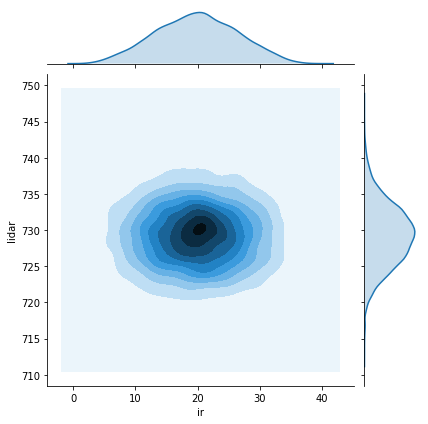

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(
    '../data/range_sensor/sensor_data_700.txt',
    delimiter=' ',
    header=None,
    names=('date', 'time', 'ir', 'lidar'))

# 12時から16時のデータを抽出
# ほぼガウス分布に従うところを恣意的に選択
h_12 = 120000
h_16 = 160000
data_from_12_to_16 = data[(h_12 <= data['time']) & (data['time'] < h_16)]
ir_and_lidar_from_12_to_16 = data_from_12_to_16.loc[:, ['ir', 'lidar']]

sns.jointplot(
    ir_and_lidar_from_12_to_16['ir'],
    ir_and_lidar_from_12_to_16['lidar'],
    ir_and_lidar_from_12_to_16,
    kind='kde')
plt.show()

このヒストグラムを同時確率分布と考えてガウス分布に当てはめることを考える

$x$をir、$y$をlidarとするセンサ値のベクトルを${\bf z}_{i}$とすると、

$$
    {\bf z}_{IR, Li} = \{ {\bf z}_{i} = \left( x_{i} y_{i} \right)^{\top} \mid i = 0,1,2, \cdots N-1\}
$$

多次元ガウス分布

$$
    p({\bf z}) = \frac{1}{(2\pi)^{\frac{n}{2}}\sqrt{\mid \Sigma \mid}} \exp \biggr\{- \frac{1}{2} \left({\bf x - \boldsymbol\mu} \right)^{\top} \Sigma^{-1} \left({\bf x - \boldsymbol\mu} \right) \biggl\}
$$

$n = 1$として$\Sigma$を$\sigma^{2}$とすると1次元のものと一致する